# Week 1: The basics

## What are we even doing here? 

In this part of CS102, we will study 4 ubiquitous [Python](https://www.python.org/) packages:
- [NumPy](https://numpy.org/) : scientific computing
- [pandas](https://pandas.pydata.org/) : data analysis
- [Matplotlib](https://matplotlib.org/) : data visualisation
- [scikit-learn](https://scikit-learn.org/stable/) : machine learning

These cover the 4 main topics of CS102-2. We may use other pacakges as well, but these are our focus. 

## Jupyter ♃

We will use [Jupyter notebooks](https://jupyter.org/). They enable us to display math (and text) and run code in real-time. 

There are a few ways to work with Jupyter notebooks (`ipynb` files). 

You can install it on your local machine at [jupyter.org/install](https://jupyter.org/install).

![](imgs/Jupyter.png)

You can use the [binder](https://mybinder.org/) button on the [GitHub page](https://github.com/joshmaglione/CS102-Jupyter?tab=readme-ov-file#binder).

![](imgs/Binder.png)

You can always just do something else... You can read about what I do [here](https://github.com/joshmaglione/CS102-Jupyter?tab=readme-ov-file#the-way-i-jupyter-in-class).

Either way, we need to interact with `Python`, which is the most popular language according to [TIOBE](https://www.tiobe.com/tiobe-index/).

## OK, so how do I get `Python`? 🐍

Multiple ways to get `Python` on your own machine.

You can download and install from [python.org](https://www.python.org/downloads/).

![](imgs/Python.png)

You can use [Conda](https://docs.conda.io/en/latest/) to install and manage various packages.

![](imgs/Conda.png)

There are other ways as well. If you are having a hard time, send me an email (joshua.maglione@universityofgalway.ie), and we can figure it out.

## Show me what you've got

Let's demonstrate these 4 packages (or modules) in concert. We will also use the `Pillow` package for image conversion. 

We will 
1. convert a picture into a list of its pixels in $\mathbb{R}^3$ (for red, green, blue values), 
2. plot those points in a 3D scatter plot, 
3. then approximate our image using only $k$ distinct colours, for some input $k$.

Here is code to take a string (pointing to an image file) and return a 3D scatter plot of a sample of pixels. 

In [1]:
def image_to_plot(file:str, N:int):
    from PIL import Image
    import numpy as np
    import matplotlib.pyplot as plt
    img = Image.open(file)
    aimg = np.asarray(img)/255
    acolor = aimg.reshape(aimg.shape[0]*aimg.shape[1], aimg.shape[2])
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    rng = np.random.default_rng()
    S = rng.choice(acolor.shape[0], size=N, replace=False)
    # S = range(acolor.shape[0])
    xs, ys, zs = np.array([acolor[s,:] for s in S]).T
    ax.scatter3D(xs, ys, zs, s=0.5)
    ax.set_xlabel("R")
    ax.set_ylabel("G")
    ax.set_zlabel("B")
    return ax

Let's input our image which is `imgs/umbrellas.jpg`:

![](imgs/umbrellas.jpg)

This is about 400 x 600 pixels, so about $250,000$ total pixels.

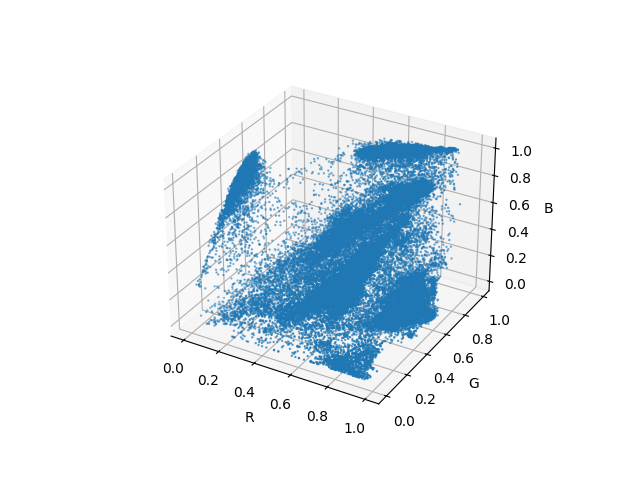

In [2]:
%matplotlib ipympl
fig = image_to_plot("imgs/umbrellas.jpg", 50000)

In [3]:
%matplotlib inline

Now we provide the code to prescribe the exact number of colours.

In [4]:
def k_colours(file:str, k:int):
    from PIL import Image
    import numpy as np
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    plt.figure().clear()
    img = Image.open(file, )
    aimg = np.asarray(img)/255
    acolor = aimg.reshape(aimg.shape[0]*aimg.shape[1], aimg.shape[2])
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(acolor)
    means = [list(map(lambda x: x, pt)) for pt in kmeans.cluster_centers_]
    result = np.asarray(list(map(lambda i: means[i], kmeans.labels_)))
    aimg_new = result.reshape(aimg.shape[0], aimg.shape[1], aimg.shape[2])
    return Image.fromarray((aimg_new * 255).astype(np.uint8))

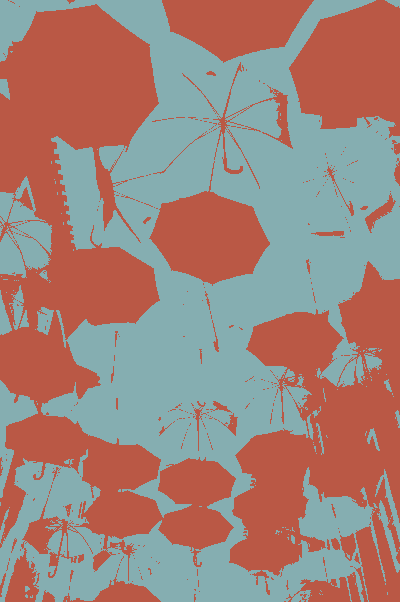

<Figure size 640x480 with 0 Axes>

In [13]:
k_colours("imgs/umbrellas.jpg", 2)